# Drop Out layer

**Randomly Drop Nodes**
- Dropout is a regularization method that approximates training a large number of neural networks with different architectures in parallel.

- During training, some number of layer outputs are randomly ignored or “dropped out.” This has the effect of making the layer look-like and be treated-like a layer with a different number of nodes and connectivity to the prior layer. In effect, each update to a layer during training is performed with a different “view” of the configured layer.

- Dropout has the effect of making the training process noisy, forcing nodes within a layer to probabilistically take on more or less responsibility for the inputs.
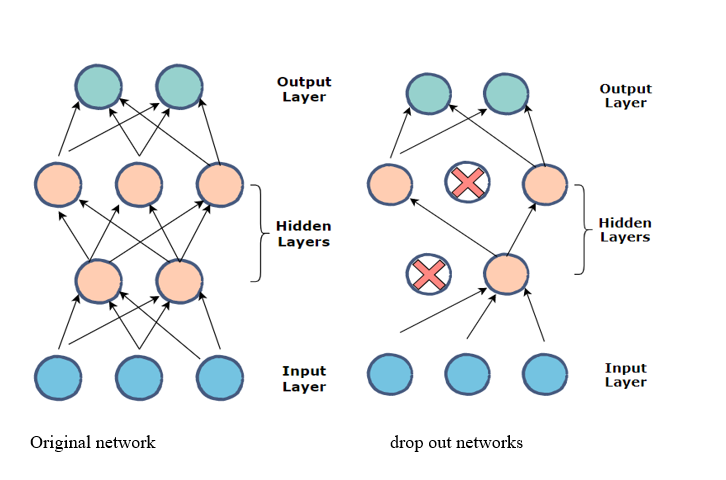

# 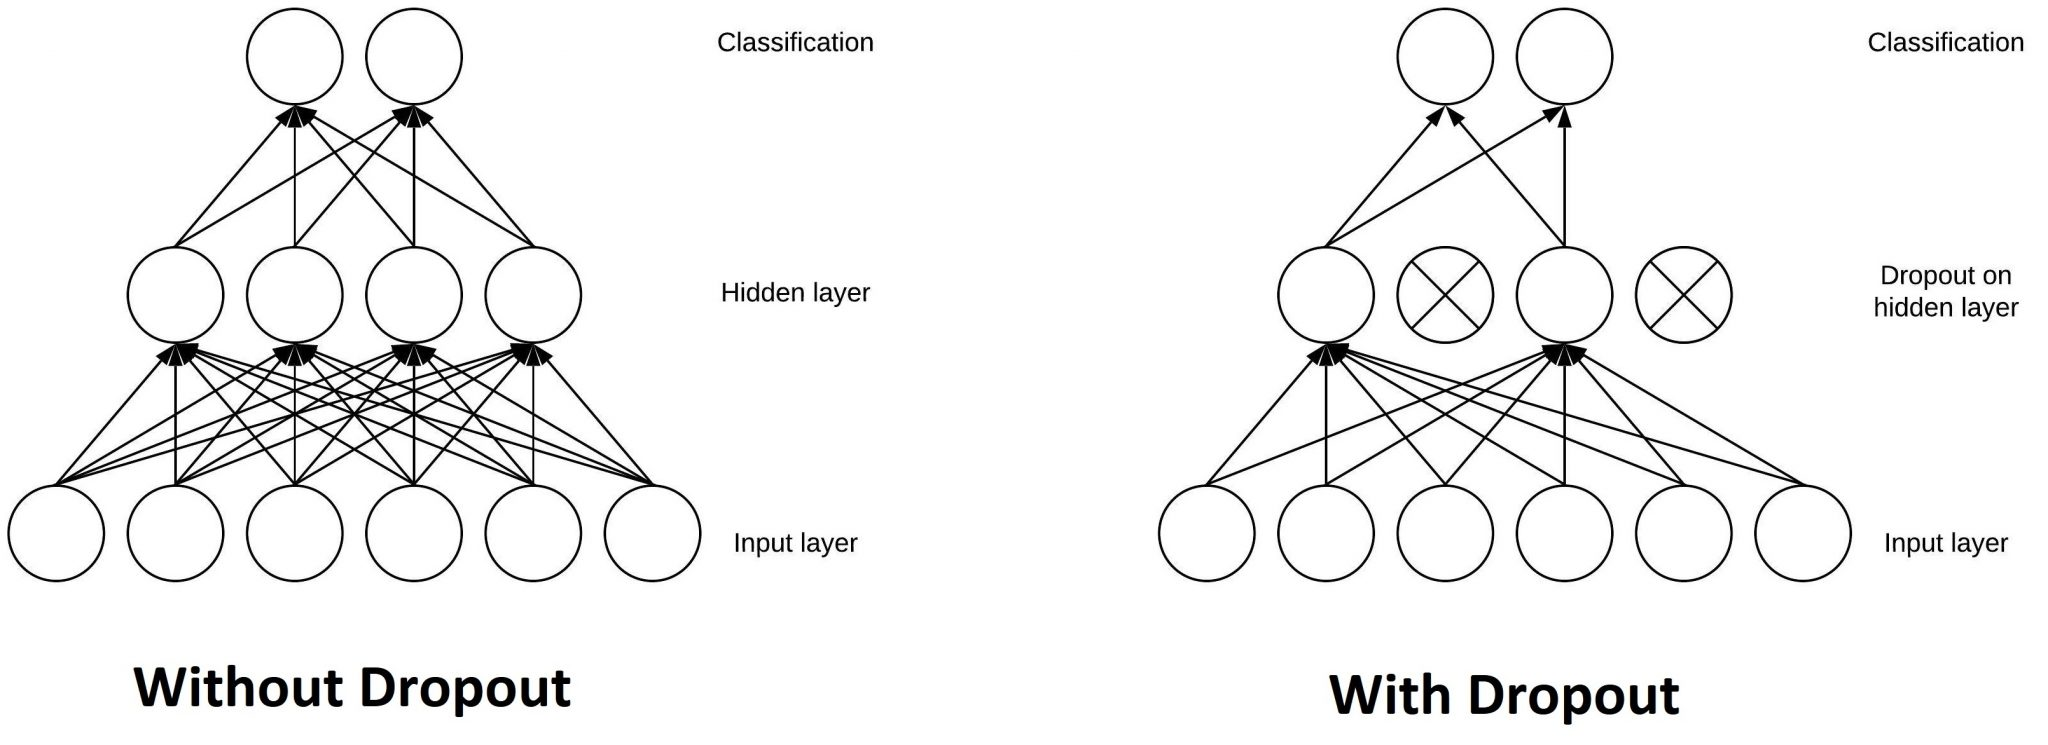

# Early Stopping

- In deep learning, early stopping is a form of regularization used to avoid overfitting when training a learner with an iterative method, such as gradient descent. Such methods update the learner so as to make it better fit the training data with each iteration.

- A problem with training neural networks is in the choice of the number of training epochs to use.

- Too many epochs can lead to overfitting of the training dataset, whereas too few may result in an underfit model. Early stopping is a method that allows you to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation dataset.

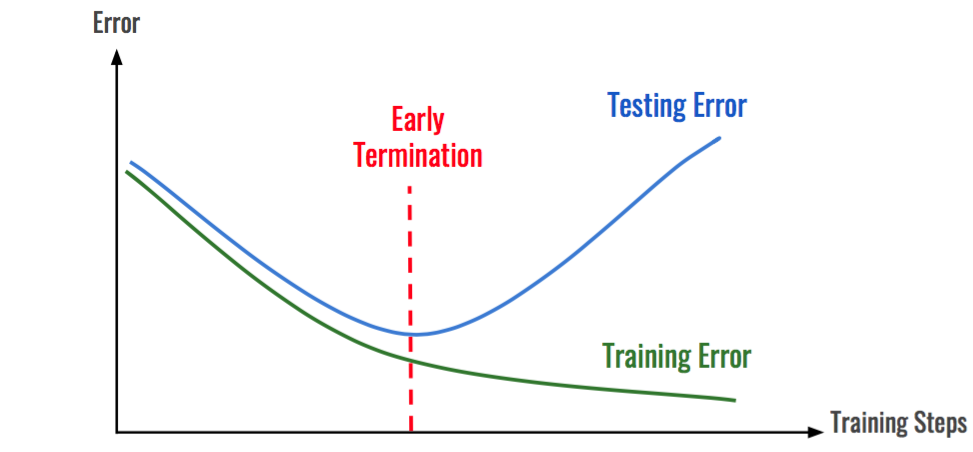

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split

In [5]:
x = df.iloc[:,3:-1]
y = df.iloc[:,-1]

In [7]:
oe = OrdinalEncoder()

x.loc[:,"Geography":'Gender'] = oe.fit_transform(x.loc[:,"Geography":'Gender'])
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0.0,0.0,42,2,0.00,1,1,1,101348.88
1,608,2.0,0.0,41,1,83807.86,1,0,1,112542.58
2,502,0.0,0.0,42,8,159660.80,3,1,0,113931.57
3,699,0.0,0.0,39,1,0.00,2,0,0,93826.63
4,850,2.0,0.0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0.0,1.0,39,5,0.00,2,1,0,96270.64
9996,516,0.0,1.0,35,10,57369.61,1,1,1,101699.77
9997,709,0.0,0.0,36,7,0.00,1,0,1,42085.58
9998,772,1.0,1.0,42,3,75075.31,2,1,0,92888.52


In [8]:
sc = StandardScaler()

x = sc.fit_transform(x)

In [9]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=1)

In [10]:
ann =Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dense(units=20, activation='relu'))

ann.add(Dense(units=1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy')

ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), epochs=250)

Epoch 1/250
250/250 [==============================] - 2s 3ms/step - loss: 0.5135 - val_loss: 0.4285
Epoch 2/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4106 - val_loss: 0.3954
Epoch 3/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3838 - val_loss: 0.3712
Epoch 4/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3653 - val_loss: 0.3582
Epoch 5/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3541 - val_loss: 0.3489
Epoch 6/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3477 - val_loss: 0.3460
Epoch 7/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3448 - val_loss: 0.3428
Epoch 8/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3410 - val_loss: 0.3403
Epoch 9/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3384 - val_loss: 0.3379
Epoch 10/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3360 - val_lo

<AxesSubplot:>

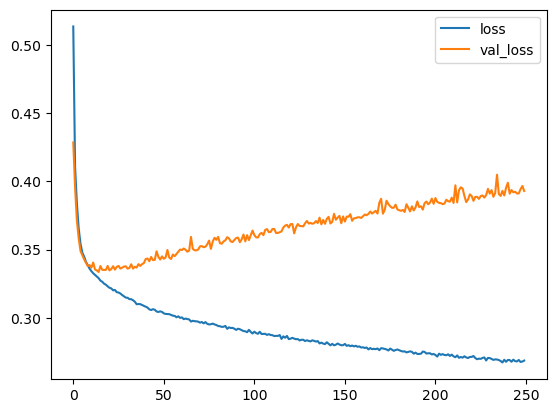

In [14]:
val_loss = pd.DataFrame(ann.history.history)

val_loss.plot()

# Early Stopping

In [15]:
early = EarlyStopping(monitor='val_loss',mode='min', patience=25)

In [16]:
ann = Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dense(units=20, activation='relu'))
ann.add(Dense(units=1, activation='sigmoid'))
ann.compile(optimizer='adam', loss = 'binary_crossentropy')

ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), callbacks=[early], epochs=250)

Epoch 1/250
250/250 [==============================] - 2s 4ms/step - loss: 0.4811 - val_loss: 0.4280
Epoch 2/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4140 - val_loss: 0.3953
Epoch 3/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3849 - val_loss: 0.3702
Epoch 4/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3642 - val_loss: 0.3526
Epoch 5/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3539 - val_loss: 0.3470
Epoch 6/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3500 - val_loss: 0.3444
Epoch 7/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3465 - val_loss: 0.3408
Epoch 8/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3438 - val_loss: 0.3389
Epoch 9/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3418 - val_loss: 0.3382
Epoch 10/250
250/250 [==============================] - 1s 2ms/step - loss: 0.3400 - val_lo

<AxesSubplot:>

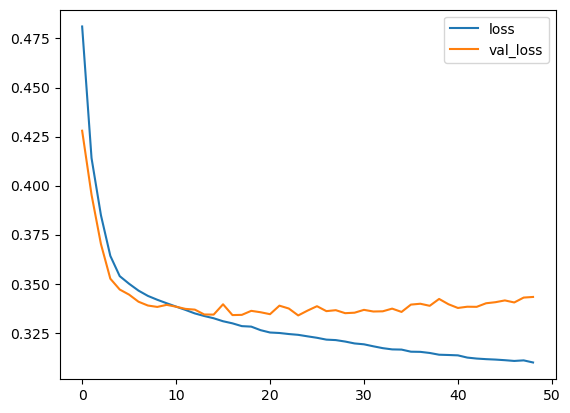

In [17]:
early_loss = pd.DataFrame(ann.history.history)

early_loss.plot()

# Drop Out Layer

In [22]:
ann = Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=20, activation='relu'))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=1, activation='sigmoid'))
ann.compile(optimizer='adam',loss='binary_crossentropy')
ann.fit(xtrain,ytrain, validation_data=(xtest,ytest), epochs = 250)

Epoch 1/250
250/250 [==============================] - 2s 4ms/step - loss: 0.5874 - val_loss: 0.4730
Epoch 2/250
250/250 [==============================] - 1s 3ms/step - loss: 0.5022 - val_loss: 0.4491
Epoch 3/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4815 - val_loss: 0.4378
Epoch 4/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4705 - val_loss: 0.4310
Epoch 5/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4558 - val_loss: 0.4247
Epoch 6/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4574 - val_loss: 0.4221
Epoch 7/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4488 - val_loss: 0.4167
Epoch 8/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4450 - val_loss: 0.4108
Epoch 9/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4390 - val_loss: 0.4048
Epoch 10/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4277 - val_lo

<AxesSubplot:>

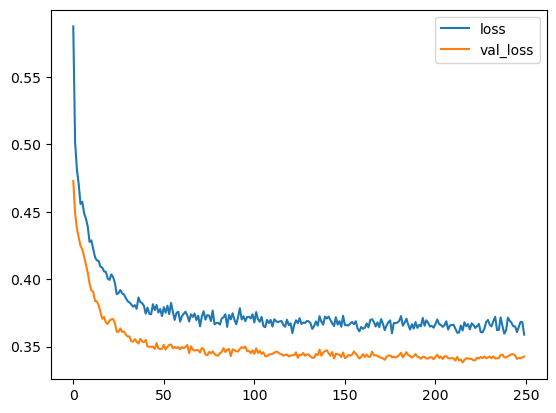

In [23]:
drop_loss = pd.DataFrame(ann.history.history)
drop_loss.plot()

# Early Stopping + Drop Out layer

In [24]:
ann = Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=20, activation='relu'))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=1, activation='sigmoid'))
ann.compile(optimizer='adam',loss='binary_crossentropy')
ann.fit(xtrain,ytrain, validation_data=(xtest,ytest),callbacks=[early], epochs = 250)

Epoch 1/250
250/250 [==============================] - 2s 3ms/step - loss: 0.6286 - val_loss: 0.4715
Epoch 2/250
250/250 [==============================] - 1s 2ms/step - loss: 0.5020 - val_loss: 0.4453
Epoch 3/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4758 - val_loss: 0.4306
Epoch 4/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4624 - val_loss: 0.4191
Epoch 5/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4557 - val_loss: 0.4140
Epoch 6/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4424 - val_loss: 0.4078
Epoch 7/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4366 - val_loss: 0.4017
Epoch 8/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4360 - val_loss: 0.3968
Epoch 9/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4307 - val_loss: 0.3936
Epoch 10/250
250/250 [==============================] - 1s 2ms/step - loss: 0.4213 - val_lo

<AxesSubplot:>

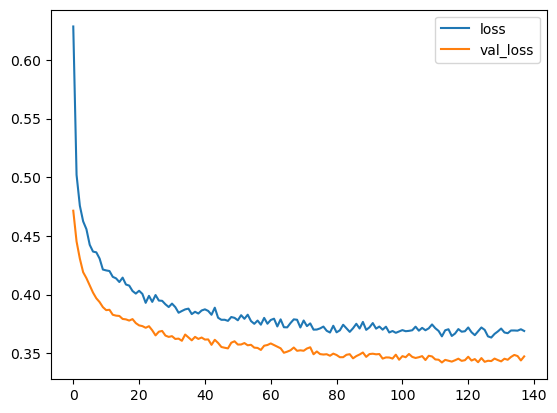

In [25]:
de_loss = pd.DataFrame(ann.history.history)
de_loss.plot()

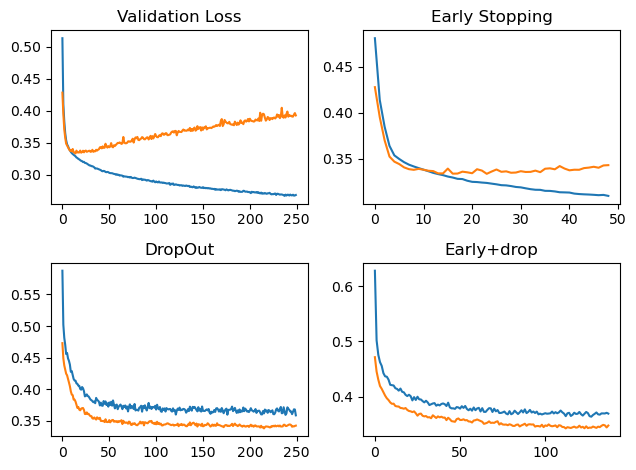

In [28]:
plt.subplot(2,2,1)
plt.plot(val_loss)
plt.title('Validation Loss')

plt.subplot(2,2,2)
plt.plot(early_loss)
plt.title('Early Stopping')

plt.subplot(2,2,3)
plt.plot(drop_loss)
plt.title('DropOut')

plt.subplot(2,2,4)
plt.plot(de_loss)
plt.title('Early+drop')

plt.tight_layout()